In [1]:
#adding pydecomp 
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/core/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/utils/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")

In [2]:
from pydecomp.core.TSVD import TSVD
import numpy as np

In [3]:
    #test procedure for the standard numpy matrix SVD
    from time import time
    print("\n Testing SVD with random matrix\n")
    n,m=10000,500
    F=np.random.rand(n,m)
    # F=np.reshape(np.arange(n*m),(n,m))

    t=time()
    phi, sigma, A=TSVD(F,solver='EVD',rank=5)
    print('\n --------------SVD by EVD computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))    
    
    t=time()
    phi, sigma, A=TSVD(F,solver='PRIMME',rank=5,epsilon=1e-6)
    print('\n --------------PRIMME_SVDs computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))


 Testing SVD with random matrix


 --------------SVD by EVD computing time {} 0.11861538887023926
r=5
sigma[:5]= [[1118.46817961]
 [  35.17258165]
 [  35.07453087]
 [  35.05880554]
 [  35.00199405]]

 Should be small : 640.9423209509383
Selected PRIMME_SVDS solver. This solver is iterative and best               suited for sparse tall skinny matrices. High accuracy requirement               may lead to intractable CPU times.

 --------------PRIMME_SVDs computing time {} 0.8108201026916504
r=5
sigma[:5]= [[1118.46817961]
 [  35.17258164]
 [  35.07453073]
 [  35.05880548]
 [  35.00199386]]

 Should be small : 640.9423209728621


In [4]:
import scipy
import primme
# Sparse random rectangular matrix 10^5x100
#A = scipy.sparse.rand(100000, 100, density=1., random_state=10)
#print(A.size)
# Compute the three closest singular values to 6.0 with a tolerance of 1e-6
svecs_left, svals, svecs_right, stats = primme.svds(F, 5, which='LM',
                                                    return_stats=True)
A_svals = svals
print(svals)
print(stats["elapsedTime"], stats["numMatvecs"])

[1118.46817961   35.17258165   35.07453087   35.05880554   35.00199405]
1.6204149723052979 545


In [5]:
(sigma[:,0]-svals)/sigma[:,0]

array([-2.03290250e-15, -2.04123116e-11, -4.10001487e-09, -1.87305872e-09,
       -5.45266799e-09])

In [6]:
np.set_printoptions(precision=3)
print("phi orthog test")
print(phi.T@phi)
print("svecs orthog test")
print(svecs_left.T@svecs_left)

print("v orthog test")
print(A.T@A)
print("svecs orthog test")
print(svecs_right@svecs_right.T)

phi orthog test
[[ 1.000e+00 -3.463e-15  1.598e-15 -5.601e-15  2.150e-16]
 [-3.463e-15  1.000e+00  3.710e-14 -2.969e-13  3.306e-14]
 [ 1.598e-15  3.710e-14  1.000e+00  6.603e-14  1.511e-14]
 [-5.601e-15 -2.969e-13  6.603e-14  1.000e+00  2.686e-14]
 [ 2.150e-16  3.306e-14  1.511e-14  2.686e-14  1.000e+00]]
svecs orthog test
[[ 1.000e+00  1.086e-14  1.810e-14 -2.223e-14 -8.659e-15]
 [ 1.086e-14  1.000e+00  3.158e-13  2.262e-13  7.401e-14]
 [ 1.810e-14  3.158e-13  1.000e+00 -2.421e-13  1.374e-13]
 [-2.223e-14  2.262e-13 -2.421e-13  1.000e+00  4.582e-13]
 [-8.659e-15  7.401e-14  1.374e-13  4.582e-13  1.000e+00]]
v orthog test
[[ 1.000e+00 -2.429e-16 -4.857e-17 -1.908e-16  1.908e-16]
 [-2.429e-16  1.000e+00  7.910e-16 -1.131e-15 -1.128e-16]
 [-4.857e-17  7.910e-16  1.000e+00  7.806e-17  2.144e-15]
 [-1.908e-16 -1.131e-15  7.806e-17  1.000e+00 -4.476e-16]
 [ 1.908e-16 -1.128e-16  2.144e-15 -4.476e-16  1.000e+00]]
svecs orthog test
[[ 1.000e+00  1.874e-16  4.562e-16 -5.690e-16 -3.556e-16]
 [ 

In [7]:
import math
import numpy as np
q=2
shape=[65,64]
size=np.product(shape)
D=int(round(math.log( size, q )))
new_shape=[q] * D
tuple( [ q**(int(math.log(s-0.5,q))+1) for s in shape ] )

(128, 64)

In [8]:
print(new_shape)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [9]:
A=np.ones(new_shape)

In [10]:
B=np.ones(shape)

In [11]:
A.size==B.size

False

In [12]:
(math.log( size, q )).is_integer()

False

In [13]:
from pydecomp.core import QuanticsTT

reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1]
[1 2 4 5 5 5 5 5 5 5 5 5 5 5 5 5 4 2 1]
[1 2 4 6 6 6 6 6 6 6 6 6 6 6 6 6 4 2 1]
[1 2 4 7 7 7 7 7 7 7 7 7 7 7 7 7 4 2 1]
[1 2 4 8 8 8 8 8 8 8 8 8 8 8 8 8 4 2 1]
[1 2 4 8 9 9 9 9 9 9 9 9 9 9 9 8 4 2 1]
[ 1  2  4  8 10 10 10 10 10 10 10 10 10 10 10  8  4  2  1]
[ 1  2  4  8 15 15 15 15 15 15 15 15 15 15 15  8  4  2  1]
[ 1  2  4  8 16 20 20 20 20 20 20 20 20 20 16  8  4  2  1]
[ 1  2  4  8 16 25 25 25 25 25 25 25 25 25 16  8  4  2  1]
[ 1  2  4  8 16 30 30 30 30 30 30 30 30 30 16  8  4  2  1]
[ 1  2  4  8 16 32 35 35 35 35 35 35 35 32 16  8  4  2  1]
[ 1  2  4  8 16 32 40 40 40 40 40 40 40 32 16  8  4  2  1]
[ 1  2  4  8 16 32 50 50 50 50 50 50 50 32 16  8  4  2  1]
[ 1  2  4  8 16 32 60 60 60 60 60 60 60 32 16  8  4  2  1]
[ 1  2  4  8 16 32 64 70 70 70 70 70 64 3

/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:177: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


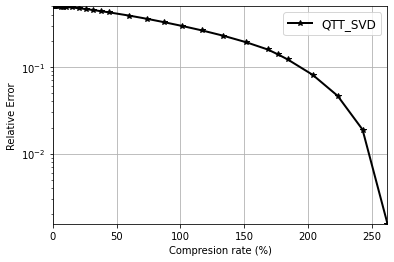

In [14]:
QuanticsTT.run_test()

In [15]:
qA = QuanticsTT.QuanticsTensor(np.ones((64,64)))

In [16]:
type(qA)==QuanticsTT.QuanticsTensor

True

## Benchmarking QTT
Comparing QTT against standard 2D decomposition methods for separable functions produces intersting results. The approximation accuracy is slightly lower for fixed range because of what I would call edge effect. On the other hand for space size larger than $2^{10}$, the decomposition becomes faster, by orders of magnitude and the compression rate extremely small (as shown below). Typicall compression values are in $O(10^{-5})$ for $\varepsilon = 10^{-3}$.

8192
reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 2 2 1]
QTT_SVD decompostion time: 2.67 s
(array([5.193e-02, 6.411e-03, 2.252e-04, 2.128e-05]), array([1.490e-06, 5.722e-06, 1.192e-05, 1.806e-05]))
SVD_by_EVD decompostion time: 12.37 s
4 8192 4096
{'QTT_SVD': array([5.193e-02, 6.411e-03, 2.252e-04, 2.128e-05]), 'SVD_by_EVD': array([2.379e-02, 4.509e-04, 8.259e-06, 1.499e-07])}


/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)


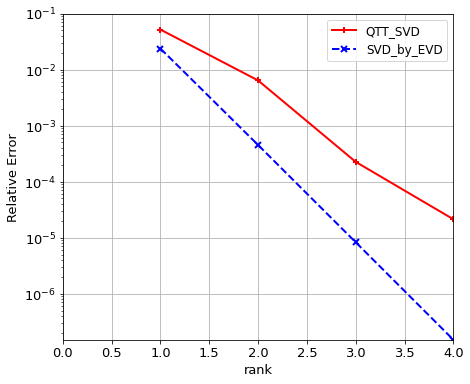

In [31]:
from analysis.benchmark_2D import benchmark_2D
decomp_methods=["QTT_SVD","SVD_by_EVD"]
N=2**13
print(N)
benchmark_2D(decomp_methods ,shape=[N,N//2], test_function=1, plot=True,
                plot_name='',tol=1e-8)

## Next development step
 - test QTT agains other high order decomposition methods
 - Include $L_1$, $L_2$ and $L_\infty$ norms as per requested
 - find and external library to test HT. probably no time, nor point in conding HT